<a href="https://colab.research.google.com/github/Marcosias0400/Optimizacion/blob/main/Funciones_optimizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funciones a Optimizar

Se van a optimizar las siguientes funciones; seguiran la siguiente estructura:

*Grafica

*Punto mínimo y valor del mínimo

Funciones a Optimizar:

->f1(x)= -x^6/60-x^5/50+x^4/2+2x^3/3-3.2x^2-6.4x

->f2(x)=-(x^6+x^5-10x^2-10x-12)/(x^2+6)

->f3(x)=5-(x4+2x3-3x2+13)^(1/2)

->f4(x)= sin^2(3x+45)+0.9sin^33 (9x)-sin (15x+50)cos (2x-30)

->f5(x)=sin(2πx)/x-cos(3πx)/x

->f6(x)= (2x-1)/x^2

->f7(x)= x^4 (log |x| - 1)

->f8(x)=e^(-x)(log |x|+x/|x|)

In [ ]:
%matplotlib inline
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Definicion de las funciones de prueba
def f1(x):
  return -x**6/60-x**5/50+x**4/2+2*x**3/3-3.2*x**2-6.4*x
def f2(x):
  return -(x**6+x**5-10*x**2-10*x-12)/(x**2+6)
def f3(x):
  return 5-np.sqrt(x**4 + 2*x**3 - 3*x**2 + 13)
def f4(x):
  return (np.sin(3*x+45))**2+0.9*(np.sin(9*x))**3-np.sin(15*x+50)-np.cos(2*x-30)
def f5(x):
  return np.sin(2*np.pi*x)/x-np.cos(3*np.pi*x)/x
def f6(x):
  return (2*x-1)/x**2
def f7(x):
  return  -(np.log(abs(x))-1)*x**4
def f8(x):
  return np.exp(-x)*(np.log(abs(x))+x/abs(x))

In [ ]:
# Funciones de graficacion
def plotPuntos(a,b,f):
  # linea de puntos de la funcion f
  #   a es el limite inferior
  #   b es el limite inferior
  X=np.linspace(a,b,100)
  F=f(X)
  # Retornan los valores de la funcion y una linea de R con 100 particion
  return X,F
def GraficarFuncionObjetivo(a,b,f):
  # Lineas de puntos de x y f(x)
  X,F=plotPuntos(a,b,f)
  # Crea el objeto grafica, color azul
  plt.plot(X,F,'b')
  # Nombre del eje x
  plt.xlabel('x')
  # Nombre del eje y
  plt.ylabel('f(x)')
  # Grafica una malla
  plt.grid()
  # Muestra la grafica
  plt.show()

In [ ]:
# Primera derivada en un punto
def d1f(f,x):
  # Definida con diferenciacion numerica
  h=1e-6
  return (f(x+h)-f(x-h))/(2*h)
def d2f(f,x):
  # Definida con diferenciacion numerica
  h=1e-6
  return (f(x+h)-2*f(x)+f(x-h))/h**2

In [ ]:
# definicion de las rutinas de optimizacion
# Metodo de la biseccion
def biseccion(a,b,f):
  # Tolerancia del metodo
  tol=0.001
  paso=True
  # contador de las iteraciones
  cont=0
  # registro de las iteraciones
  registro=[]
  while(paso):
    # bisecta el dominio de busqueda
    c=(a+b)/2
    # Primera derivada en a
    df_a=d1f(f,a)
    # Primera derivada en c
    df_c=d1f(f,c)
    if df_a*df_c<0:
      b=c
    else:
      a=c
    # Condicion de finalizacion
    if abs(b-a)<tol:
      paso=False
    cont+=1
    registro.append([cont,a,f(a)])
  return registro

In [ ]:
# Metodo de newton Rapson
def newtonRaphson(a,b,f):
  # Punto inicial
  x=b
  # Tolerancia del metodo
  tol=0.001
  # contador de iteraciones
  cont=0
  # Registro de convergencia del metodo
  registro=[]
  # Bandera de ruptura
  paso=True
  while paso:
    # Calculo de derivadas en un punto x_i
    d1f_x=d1f(f,x)
    d2f_x=d2f(f,x)
    xn=x
    x=xn-d1f_x/d2f_x
    f_x=f(x)
    cont+=1
    registro.append([cont,x,f_x])
    # si la tolerancia es menor se ropr
    if abs(x-xn)<tol:
      paso=False
  return registro

In [ ]:
# Metodo de la secante
def secante(a,b,f):
  # Tolerancia del metodo
  tol=0.001
  # contador de iteraciones
  cont=0
  # registro de la convergancia del metodo
  registro=[]
  paso=True
  while paso:
    # Calcular la primera derivada en a
    df_a=d1f(f,a)
    df_b=d1f(f,b)
    # Calculo de c
    c=b-df_b*(b-a)/(df_b-df_a)
    if d1f(f,c)>0:
      b=c
    else:
      a=c
    cont+=1
    registro.append([cont,c,f(c)])
    if abs(d1f(f,c))<tol:
      paso=False
  return registro


In [ ]:
# metod de la seccion dorada
def seccion_dorada(a,b,f):
  #2 menos el numero phi (proporcion aurea)
  t=2-1.618033988
  #tolerancia
  tol=1e-6
  # Nuevos limites
  a1=a*(1-t)+b*t
  b1=a*t+b*(1-t)
  # Registro
  reg=[]
  cont=0
  paso=True
  while paso:
    if f(a1)>f(b1):
      a=a1
    else:
      b=b1
    cont+=1
    reg.append([cont,b1,f(b1)])
    if abs(a-b)<tol:
      paso=False
    else:
      a1=a*(1-t)+b*t
      b1=a*t+b*(1-t)
  return reg

In [ ]:
# Una Funcion que muestra los registros de cada metodo de optimizacion
def registro(regs):
  # Recibe un registro e itera sobre el
  for i in regs:
    # El formato es iteracion, x, f
    print('It {:02} -- x: {:.10f} -- f:{:.10f}'.format(i[0],i[1],i[2]))

# Análisis de la convergenaica de funciones
Como se puede observar aún cuando la función tiene varios máximos y mínimos todos los métodos convergen enh ma o menos pasos y además en este caso encuentran mínimos o máximos locales (no siempre toman en cuanta los extremos), como es una función suave el que tiende a converger mas rápido en este caso fue el método de newton Raphson

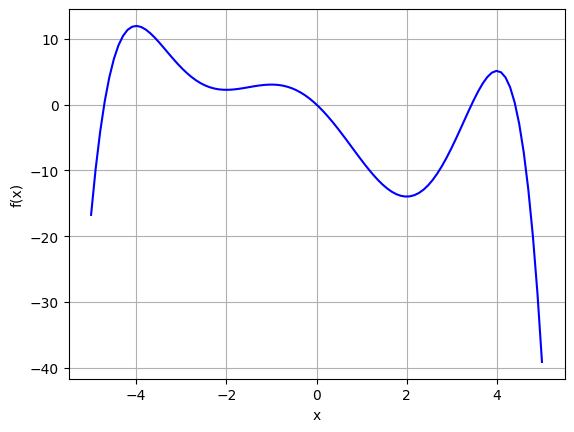

Optimizacion con biseccion:

It 01 -- x: -5.0000000000 -- f:-16.7500000000
It 02 -- x: -5.0000000000 -- f:-16.7500000000
It 03 -- x: -5.0000000000 -- f:-16.7500000000
It 04 -- x: -4.3750000000 -- f:9.2879673640
It 05 -- x: -4.0625000000 -- f:11.8877322823
It 06 -- x: -4.0625000000 -- f:11.8877322823
It 07 -- x: -4.0625000000 -- f:11.8877322823
It 08 -- x: -4.0234375000 -- f:11.9386165266
It 09 -- x: -4.0039062500 -- f:11.9464462957
It 10 -- x: -4.0039062500 -- f:11.9464462957
It 11 -- x: -4.0039062500 -- f:11.9464462957
It 12 -- x: -4.0014648438 -- f:11.9466357337
It 13 -- x: -4.0002441406 -- f:11.9466658082
It 14 -- x: -4.0002441406 -- f:11.9466658082

 Optimizacion con Newton-Raphson:

It 01 -- x: 4.4298502721 -- f:-0.7141202656
It 02 -- x: 4.1169522396 -- f:4.7656121601
It 03 -- x: 4.0117649861 -- f:5.1166521296
It 04 -- x: 4.0001285147 -- f:5.1199996036
It 05 -- x: 4.0000001283 -- f:5.1200000000

 Optimizacion con Metodo de la secante:

It 01 -- x: -0.9999999993 -- f:3.0366666667



In [ ]:
#Graficacion de la primarea funcion f1
# x=[a,b]
x1=[-5,5]
GraficarFuncionObjetivo(x1[0],x1[1],f1)
b=biseccion(x1[0],x1[1],f1)
print('Optimizacion con biseccion:\n')
registro(b)
n=newtonRaphson(x1[0],x1[1],f1)
print('\n Optimizacion con Newton-Raphson:\n')
registro(n)
s=secante(x1[0],x1[1],f1)
print('\n Optimizacion con Metodo de la secante:\n')
registro(s)
d=seccion_dorada(x1[0],x1[1],f1)
print('\n Optimizacion con Metodo de la seccion dorada:\n')
registro(d)

Por otro lado si la función oscila mucho el que mejor se comporta a largo plazo es el de la bisección; hay que resaltar que el método de la sección dorada aún cuando no converge rápido al menos encuentra un punto como pasa en las siguientes

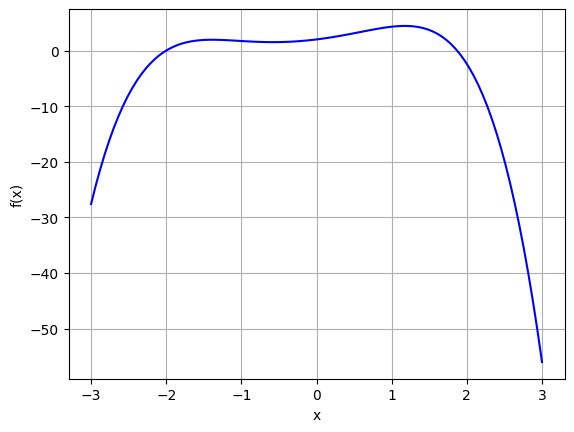

Optimizacion con biseccion:

It 01 -- x: 0.0000000000 -- f:2.0000000000
It 02 -- x: 0.0000000000 -- f:2.0000000000
It 03 -- x: 0.7500000000 -- f:3.7652901786
It 04 -- x: 1.1250000000 -- f:4.4148894279
It 05 -- x: 1.1250000000 -- f:4.4148894279
It 06 -- x: 1.1250000000 -- f:4.4148894279
It 07 -- x: 1.1718750000 -- f:4.4283698677
It 08 -- x: 1.1718750000 -- f:4.4283698677
It 09 -- x: 1.1718750000 -- f:4.4283698677
It 10 -- x: 1.1718750000 -- f:4.4283698677
It 11 -- x: 1.1748046875 -- f:4.4284708311
It 12 -- x: 1.1762695312 -- f:4.4284871116
It 13 -- x: 1.1762695312 -- f:4.4284871116

 Optimizacion con Newton-Raphson:

It 01 -- x: 2.1288362624 -- f:-5.5255450646
It 02 -- x: 1.5981515690 -- f:3.0904300003
It 03 -- x: 1.3066079763 -- f:4.3276490334
It 04 -- x: 1.1942810146 -- f:4.4267873675
It 05 -- x: 1.1769685270 -- f:4.4284868091
It 06 -- x: 1.1765788334 -- f:4.4284876219

 Optimizacion con Metodo de la secante:

It 01 -- x: -0.8101464435 -- f:1.5816755458
It 02 -- x: -0.8320766080 -- f:

In [ ]:
#Graficacion de la primarea funcion f2
# x=[a,b]
x1=[-3,3]
GraficarFuncionObjetivo(x1[0],x1[1],f2)
b=biseccion(x1[0],x1[1],f2)
print('Optimizacion con biseccion:\n')
registro(b)
n=newtonRaphson(x1[0],x1[1],f2)
print('\n Optimizacion con Newton-Raphson:\n')
registro(n)
s=secante(x1[0],x1[1],f2)
print('\n Optimizacion con Metodo de la secante:\n')
registro(s)
d=seccion_dorada(x1[0],x1[1],f2)
print('\n Optimizacion con Metodo de la seccion dorada:\n')
registro(d)

Si la función no es del todo continua o tiene una asintota, es muy común que los métodos de la secante o newton-rapson no converjan o que el de la biseccion o también el de la sección dorada converjan a los extremos del intervalo

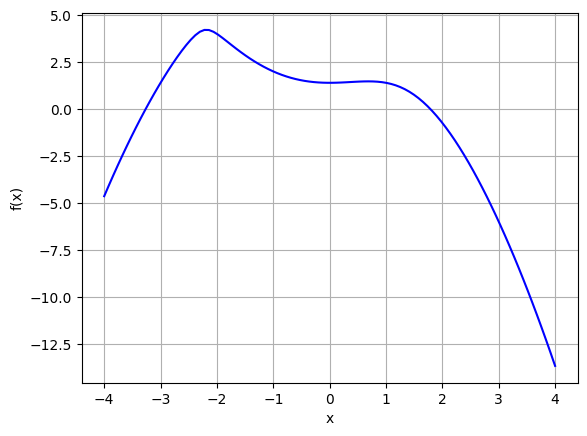

Optimizacion con biseccion:

It 01 -- x: 0.0000000000 -- f:1.3944487245
It 02 -- x: 2.0000000000 -- f:-0.7445626465
It 03 -- x: 3.0000000000 -- f:-6.0000000000
It 04 -- x: 3.5000000000 -- f:-9.5623658792
It 05 -- x: 3.7500000000 -- f:-11.5540072566
It 06 -- x: 3.8750000000 -- f:-12.6009435227
It 07 -- x: 3.9375000000 -- f:-13.1370519098
It 08 -- x: 3.9687500000 -- f:-13.4082511241
It 09 -- x: 3.9843750000 -- f:-13.5446352309
It 10 -- x: 3.9921875000 -- f:-13.6130231971
It 11 -- x: 3.9960937500 -- f:-13.6472661322
It 12 -- x: 3.9980468750 -- f:-13.6643998346
It 13 -- x: 3.9990234375 -- f:-13.6729697441

 Optimizacion con Newton-Raphson:

It 01 -- x: -0.1046339718 -- f:1.3993078528
It 02 -- x: -0.0081648529 -- f:1.3944766092
It 03 -- x: -0.0000735103 -- f:1.3944487268
It 04 -- x: 0.0000000292 -- f:1.3944487245

 Optimizacion con Metodo de la secante:

It 01 -- x: -0.4364998788 -- f:1.4930965868
It 02 -- x: -0.6981849247 -- f:1.6691509618
It 03 -- x: -1.2107419660 -- f:2.3164353552
It 04 

In [ ]:
#Graficacion de la primarea funcion f3
# x=[a,b]
x1=[-4,4]
GraficarFuncionObjetivo(x1[0],x1[1],f3)
b=biseccion(x1[0],x1[1],f3)
print('Optimizacion con biseccion:\n')
registro(b)
n=newtonRaphson(x1[0],x1[1],f3)
print('\n Optimizacion con Newton-Raphson:\n')
registro(n)
s=secante(x1[0],x1[1],f3)
print('\n Optimizacion con Metodo de la secante:\n')
registro(s)
d=seccion_dorada(x1[0],x1[1],f3)
print('\n Optimizacion con Metodo de la seccion dorada:\n')
registro(d)

Si tienen un máximo o mínimo muy cerca de los limites de la función cualquiera de los métodos tendra la tendencia a encontrar el más cercano ignorado loa máximos y mínimos absolutos

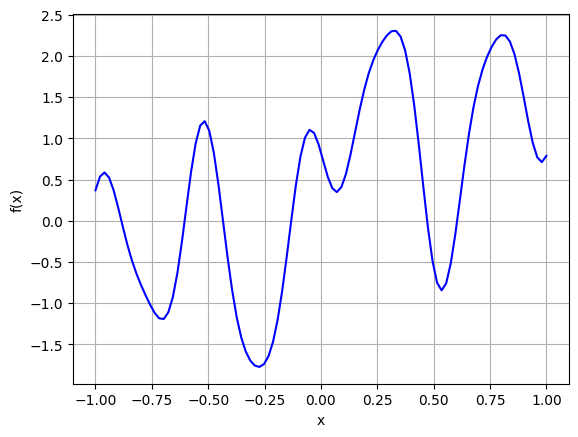

Optimizacion con biseccion:

It 01 -- x: -1.0000000000 -- f:0.3709756631
It 02 -- x: -1.0000000000 -- f:0.3709756631
It 03 -- x: -1.0000000000 -- f:0.3709756631
It 04 -- x: -1.0000000000 -- f:0.3709756631
It 05 -- x: -1.0000000000 -- f:0.3709756631
It 06 -- x: -0.9687500000 -- f:0.5797945199
It 07 -- x: -0.9687500000 -- f:0.5797945199
It 08 -- x: -0.9687500000 -- f:0.5797945199
It 09 -- x: -0.9648437500 -- f:0.5861246441
It 10 -- x: -0.9628906250 -- f:0.5876257750
It 11 -- x: -0.9619140625 -- f:0.5879640020

 Optimizacion con Newton-Raphson:

It 01 -- x: 0.9773829075 -- f:0.7126232151
It 02 -- x: 0.9786333260 -- f:0.7123602450
It 03 -- x: 0.9786316333 -- f:0.7123602445

 Optimizacion con Metodo de la secante:

It 01 -- x: 4.7229380654 -- f:-1.5006384751
It 02 -- x: 3.4020144088 -- f:0.4978196800
It 03 -- x: 2.5451731857 -- f:-1.1489476995
It 04 -- x: 1.3257251337 -- f:0.6390464797
It 05 -- x: 1.1628913574 -- f:2.1998132911
It 06 -- x: 1.0788042738 -- f:1.8996522393
It 07 -- x: 1.133917

In [ ]:
#Graficacion de la primarea funcion f4
# x=[a,b]
x1=[-1,1]
GraficarFuncionObjetivo(x1[0],x1[1],f4)
b=biseccion(x1[0],x1[1],f4)
print('Optimizacion con biseccion:\n')
registro(b)
n=newtonRaphson(x1[0],x1[1],f4)
print('\n Optimizacion con Newton-Raphson:\n')
registro(n)
s=secante(x1[0],x1[1],f4)
print('\n Optimizacion con Metodo de la secante:\n')
registro(s)
d=seccion_dorada(x1[0],x1[1],f4)
print('\n Optimizacion con Metodo de la seccion dorada:\n')
registro(d)

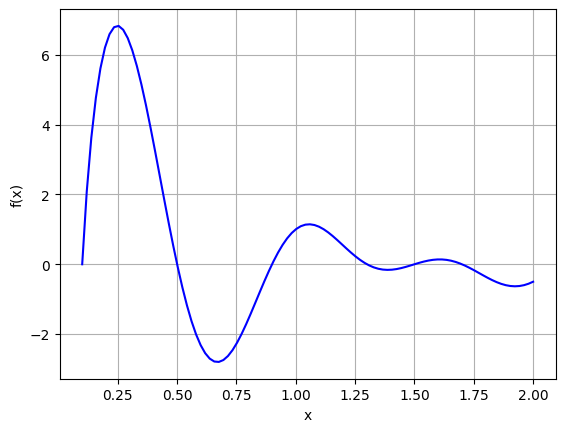

Optimizacion con biseccion:

It 01 -- x: 1.0500000000 -- f:1.1428795415
It 02 -- x: 1.5250000000 -- f:0.0504989500
It 03 -- x: 1.5250000000 -- f:0.0504989500
It 04 -- x: 1.5250000000 -- f:0.0504989500
It 05 -- x: 1.5843750000 -- f:0.1315075185
It 06 -- x: 1.5843750000 -- f:0.1315075185
It 07 -- x: 1.5992187500 -- f:0.1381050860
It 08 -- x: 1.5992187500 -- f:0.1381050860
It 09 -- x: 1.6029296875 -- f:0.1387205252
It 10 -- x: 1.6047851562 -- f:0.1388684919
It 11 -- x: 1.6057128906 -- f:0.1389022218

 Optimizacion con Newton-Raphson:

It 01 -- x: 1.9173234131 -- f:-0.6299887152
It 02 -- x: 1.9237854963 -- f:-0.6308909697
It 03 -- x: 1.9237292283 -- f:-0.6308910397

 Optimizacion con Metodo de la secante:

It 01 -- x: 2.0520988294 -- f:-0.2730476425
It 02 -- x: 2.1353498905 -- f:0.2157380547
It 03 -- x: 2.2373186417 -- f:0.7216576063
It 04 -- x: 2.2927694151 -- f:0.8251663675
It 05 -- x: 2.3004926724 -- f:0.8270300234
It 06 -- x: 2.3011223738 -- f:0.8270423858
It 07 -- x: 2.3011727517 -- f

In [ ]:
#Graficacion de la primarea funcion f5
# x=[a,b]
x1=[0.1,2]
GraficarFuncionObjetivo(x1[0],x1[1],f5)
b=biseccion(x1[0],x1[1],f5)
print('Optimizacion con biseccion:\n')
registro(b)
n=newtonRaphson(x1[0],x1[1],f5)
print('\n Optimizacion con Newton-Raphson:\n')
registro(n)
s=secante(x1[0],x1[1],f5)
print('\n Optimizacion con Metodo de la secante:\n')
registro(s)
d=seccion_dorada(x1[0],x1[1],f5)
print('\n Optimizacion con Metodo de la seccion dorada:\n')
registro(d)

Hasy casos de discontinuidad donde alguno de los métodos no encuentran nada o simplemente por fallas numericas no va a proceder

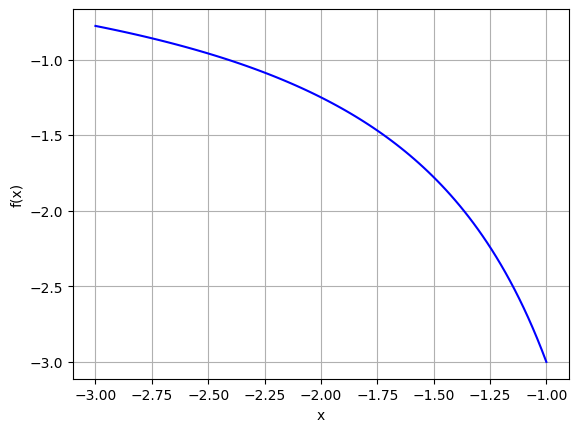

Optimizacion con biseccion:

It 01 -- x: -2.0000000000 -- f:-1.2500000000
It 02 -- x: -1.5000000000 -- f:-1.7777777778
It 03 -- x: -1.2500000000 -- f:-2.2400000000
It 04 -- x: -1.1250000000 -- f:-2.5679012346
It 05 -- x: -1.0625000000 -- f:-2.7681660900
It 06 -- x: -1.0312500000 -- f:-2.8797061524
It 07 -- x: -1.0156250000 -- f:-2.9386982249
It 08 -- x: -1.0078125000 -- f:-2.9690523406
It 09 -- x: -1.0039062500 -- f:-2.9844509379
It 10 -- x: -1.0019531250 -- f:-2.9922065289
It 11 -- x: -1.0009765625 -- f:-2.9960985128

 Optimizacion con Metodo de la secante:

It 01 -- x: -3.1600000000 -- f:-0.7330556001
It 02 -- x: -3.3124300874 -- f:-0.6949258108
It 03 -- x: -3.4582718190 -- f:-0.6619380690
It 04 -- x: -3.5983112525 -- f:-0.6330492233
It 05 -- x: -3.7331895057 -- f:-0.6074879025
It 06 -- x: -3.8634376421 -- f:-0.5846701957
It 07 -- x: -3.9895014447 -- f:-0.5641451489
It 08 -- x: -4.1117594466 -- f:-0.5455583962
It 09 -- x: -4.2305363357 -- f:-0.5286272167
It 10 -- x: -4.3461131065 -- 

In [ ]:
#Graficacion de la primarea funcion f6
# x=[a,b]
x1=[-3,-1]
GraficarFuncionObjetivo(x1[0],x1[1],f6)
b=biseccion(x1[0],x1[1],f6)
print('Optimizacion con biseccion:\n')
registro(b)
"""n=newtonRaphson(x1[0],x1[1],f6)
print('\n Optimizacion con Newton-Raphson:\n')
registro(n)"""
s=secante(x1[0],x1[1],f6)
print('\n Optimizacion con Metodo de la secante:\n')
registro(s)
d=seccion_dorada(x1[0],x1[1],f6)
print('\n Optimizacion con Metodo de la seccion dorada:\n')
registro(d)

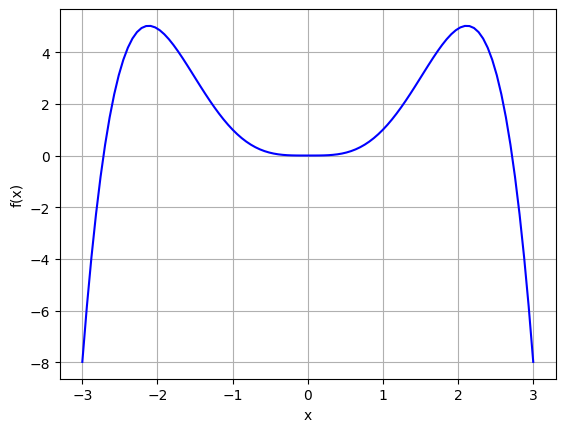

Optimizacion con biseccion:

It 01 -- x: 0.0000000000 -- f:nan
It 02 -- x: 1.5000000000 -- f:3.0098328902
It 03 -- x: 1.5000000000 -- f:3.0098328902
It 04 -- x: 1.8750000000 -- f:4.5902555217
It 05 -- x: 2.0625000000 -- f:4.9958869364
It 06 -- x: 2.0625000000 -- f:4.9958869364
It 07 -- x: 2.1093750000 -- f:5.0208662143
It 08 -- x: 2.1093750000 -- f:5.0208662143
It 09 -- x: 2.1093750000 -- f:5.0208662143
It 10 -- x: 2.1152343750 -- f:5.0213563264
It 11 -- x: 2.1152343750 -- f:5.0213563264
It 12 -- x: 2.1166992188 -- f:5.0213834200
It 13 -- x: 2.1166992188 -- f:5.0213834200

 Optimizacion con Newton-Raphson:

It 01 -- x: 2.4885960347 -- f:3.3859948244
It 02 -- x: 2.2175641729 -- f:4.9233710040
It 03 -- x: 2.1272248513 -- f:5.0204395708
It 04 -- x: 2.1171210404 -- f:5.0213840995
It 05 -- x: 2.1170000429 -- f:5.0213842308

 Optimizacion con Metodo de la secante:

It 01 -- x: 0.0000000000 -- f:nan

 Optimizacion con Metodo de la seccion dorada:

It 01 -- x: 0.7082039280 -- f:0.3383475982
It

<ipython-input-69-ea8bdc942e14>:15: RuntimeWarning: divide by zero encountered in log
  return  -(np.log(abs(x))-1)*x**4
<ipython-input-69-ea8bdc942e14>:15: RuntimeWarning: invalid value encountered in double_scalars
  return  -(np.log(abs(x))-1)*x**4


In [ ]:
#Graficacion de la primarea funcion f7
# x=[a,b]
x1=[-3,3]
GraficarFuncionObjetivo(x1[0],x1[1],f7)
b=biseccion(x1[0],x1[1],f7)
print('Optimizacion con biseccion:\n')
registro(b)
n=newtonRaphson(x1[0],x1[1],f7)
print('\n Optimizacion con Newton-Raphson:\n')
registro(n)
s=secante(x1[0],x1[1],f7)
print('\n Optimizacion con Metodo de la secante:\n')
registro(s)
d=seccion_dorada(x1[0],x1[1],f7)
print('\n Optimizacion con Metodo de la seccion dorada:\n')
registro(d)

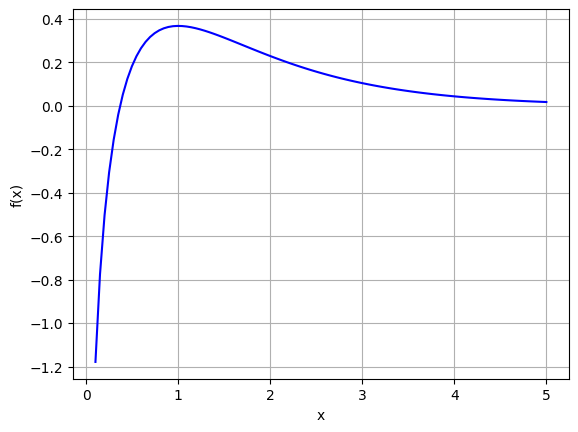

Optimizacion con biseccion:

It 01 -- x: 0.1000000000 -- f:-1.1786277323
It 02 -- x: 0.1000000000 -- f:-1.1786277323
It 03 -- x: 0.7125000000 -- f:0.3241774677
It 04 -- x: 0.7125000000 -- f:0.3241774677
It 05 -- x: 0.8656250000 -- f:0.3600672319
It 06 -- x: 0.9421875000 -- f:0.3665628312
It 07 -- x: 0.9804687500 -- f:0.3677358565
It 08 -- x: 0.9996093750 -- f:0.3678793850
It 09 -- x: 0.9996093750 -- f:0.3678793850
It 10 -- x: 0.9996093750 -- f:0.3678793850
It 11 -- x: 0.9996093750 -- f:0.3678793850
It 12 -- x: 0.9996093750 -- f:0.3678793850
It 13 -- x: 0.9996093750 -- f:0.3678793850

 Optimizacion con Metodo de la secante:

It 01 -- x: 4.9922339138 -- f:0.0177087760
It 02 -- x: 6.1069083190 -- f:0.0062577785
It 03 -- x: 6.7376655142 -- f:0.0034468363
It 04 -- x: 7.1760972909 -- f:0.0022715771
It 05 -- x: 7.5109529628 -- f:0.0016501297
It 06 -- x: 7.7811592180 -- f:0.0012741721
It 07 -- x: 8.0072420330 -- f:0.0010258846

 Optimizacion con Metodo de la seccion dorada:

It 01 -- x: 3.1283

In [ ]:
#Graficacion de la primarea funcion f8
# x=[a,b]
x1=[0.1,5]
GraficarFuncionObjetivo(x1[0],x1[1],f8)
b=biseccion(x1[0],x1[1],f8)
print('Optimizacion con biseccion:\n')
registro(b)
"""n=newtonRaphson(x1[0],x1[1],f8)
print('\n Optimizacion con Newton-Raphson:\n')
registro(n)"""
s=secante(x1[0],x1[1],f8)
print('\n Optimizacion con Metodo de la secante:\n')
registro(s)
d=seccion_dorada(x1[0],x1[1],f8)
print('\n Optimizacion con Metodo de la seccion dorada:\n')
registro(d)

#Conclusión
por lo que se ve el método mas estable es el de bisección, seguido por le de la sección dorada, mientras que los metodos de Newton y de la secante tienen la tendencia a converger mas rapido, con el riesgo que puedan entrar en una busqueda infinita y no encuentran nada